# Predict Customer Clicked Ads Classification By Using Machine Learning

### **Import Libraries and Settings**

In [2]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [3]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [4]:
df.sample(10)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
474,474,47.48,31,205514400.0,141.34,Perempuan,6/30/2016 0:19,Yes,Tangerang Selatan,Banten,Otomotif
912,912,34.96,42,258394570.0,160.49,Laki-Laki,6/1/2016 16:10,Yes,Surabaya,Jawa Timur,Otomotif
819,819,79.60,39,513745960.0,194.23,Perempuan,4/22/2016 7:48,No,Balikpapan,Kalimantan Timur,Travel
210,210,76.81,28,456205540.0,217.85,Laki-Laki,7/3/2016 12:57,No,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Travel
170,170,43.77,52,343210210.0,138.55,Laki-Laki,1/25/2016 7:39,Yes,Banjarmasin,Kalimantan Selatan,Fashion
339,339,65.90,22,423854620.0,211.39,Perempuan,7/16/2016 14:13,No,Tangerang,Banten,Fashion
424,424,43.59,36,411948390.0,132.31,Laki-Laki,5/26/2016 13:43,Yes,Jakarta Utara,Daerah Khusus Ibukota Jakarta,House
236,236,76.77,36,408438870.0,123.51,Perempuan,5/4/2016 0:01,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Bank
859,859,83.17,43,379762460.0,244.40,Laki-Laki,4/5/2016 18:02,No,Malang,Jawa Timur,Otomotif
450,450,43.41,28,414008140.0,160.73,Perempuan,2/5/2016 15:26,Yes,Tangerang Selatan,Banten,Electronic


In [5]:
df.shape

(1000, 11)

## Initial Transformation

In [6]:
# Drop index column
df.drop(columns='Unnamed: 0', inplace=True)

# Rename column name for and maintain column name similarity
df.rename(columns={'Male': 'Gender',
                   'Timestamp': 'Visit Time',
                   'city' : 'City',
                   'province' : 'Province',
                   'category' : 'Category'}, inplace=True)

# Re-arrange column (target 'Clicked on Ad' at the end --> personal preference)
df_1 = df.drop(columns='Clicked on Ad')
df_2 = df['Clicked on Ad']
df = pd.concat([df_1, df_2], axis='columns')

# Other way to re-arrange column
# df = df[[col for col in df if col != 'Clicked on Ad'] + ['Clicked on Ad']]

In [7]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Visit Time,City,Province,Category,Clicked on Ad
779,80.55,35,476118300.0,219.91,Perempuan,3/28/2016 23:01,Surakarta,Jawa Tengah,Travel,No
784,35.21,39,366380700.0,154.00,Laki-Laki,3/25/2016 6:36,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Electronic,Yes
782,80.46,29,398365100.0,230.78,Perempuan,6/4/2016 9:13,Medan,Sumatra Utara,Otomotif,No
444,32.84,40,288630230.0,171.72,Perempuan,3/10/2016 1:36,Palembang,Sumatra Selatan,Bank,Yes
334,86.38,40,464515240.0,188.27,Laki-Laki,3/19/2016 14:57,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Fashion,No
213,67.28,43,533728720.0,155.80,Laki-Laki,4/3/2016 21:13,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Travel,Yes
808,43.16,35,177600640.0,156.11,Laki-Laki,7/6/2016 3:40,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Food,Yes
771,64.38,19,367710700.0,180.47,Laki-Laki,5/27/2016 5:23,Surabaya,Jawa Timur,Travel,No
396,42.05,51,198500890.0,174.55,Laki-Laki,6/20/2016 14:20,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Otomotif,Yes
947,38.65,31,362688970.0,154.77,Laki-Laki,5/24/2016 9:50,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Bank,Yes


In [8]:
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage (%),Duplicated Values,Unique Values,5 Unique Sample
0,Daily Time Spent on Site,float64,13,1.3,0,890,"[68.95, 80.23, 69.47, 74.15, 68.37]"
1,Age,int64,0,0.0,0,43,"[35, 31, 26, 29, 23]"
2,Area Income,float64,13,1.3,0,987,"[432837300.0, 479092950.00000006, 418501580.0, 383643260.0, 517229930.00000006]"
3,Daily Internet Usage,float64,11,1.1,0,955,"[256.09, 193.77, 236.5, 245.89, 225.58]"
4,Gender,object,3,0.3,0,2,"[Perempuan, Laki-Laki, nan]"
5,Visit Time,object,0,0.0,0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:35, 1/10/2016 2:31, 6/3/2016 3:36]"
6,City,object,0,0.0,0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
7,Province,object,0,0.0,0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Timur, Kepulauan Riau, Sumatra Utara]"
8,Category,object,0,0.0,0,10,"[Furniture, Food, Electronic, House, Finance]"
9,Clicked on Ad,object,0,0.0,0,2,"[No, Yes]"


**Feature Descriptions**

- `Daily Time Spent on Site`: Time spent on the site (Minutes)
- `Age`: Age of the customer
- `Area Income`: The total income of customer in an area
- `Daily Internet Usage`: Time spent on the internet (Minutes)
- `Gender`: Gender of the customer
- `Visit Time`: Time the customer visit on the website
- `City`: City of customer's residence
- `Province`: Province of customer's residence
- `Category`: Product category
- `Clicked on Ad`: Whether the customer clicked the ad or not

In [9]:
# Data type correction for Visit Time
df['Visit Time'] = pd.to_datetime(df['Visit Time'])

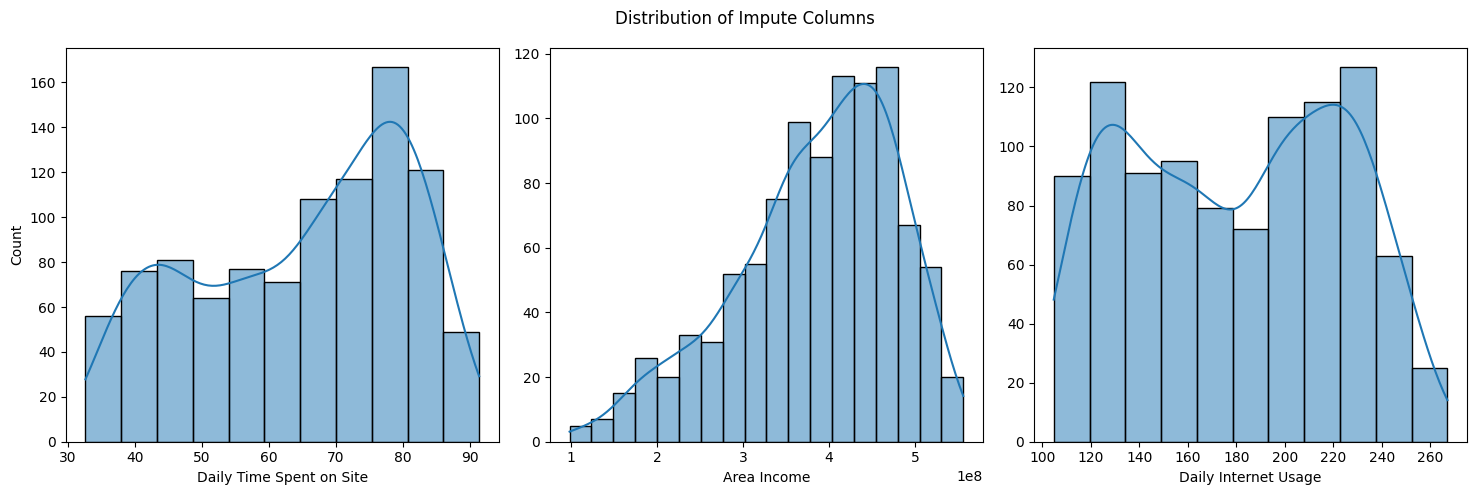

In [10]:
# Checking distribution in columns with missing value for proper imputation method
impute_col = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for each column
for i, col in enumerate(impute_col):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    if i != 0:
        ax[i].set_ylabel(None)

plt.suptitle('Distribution of Impute Columns')
plt.tight_layout()
plt.show()

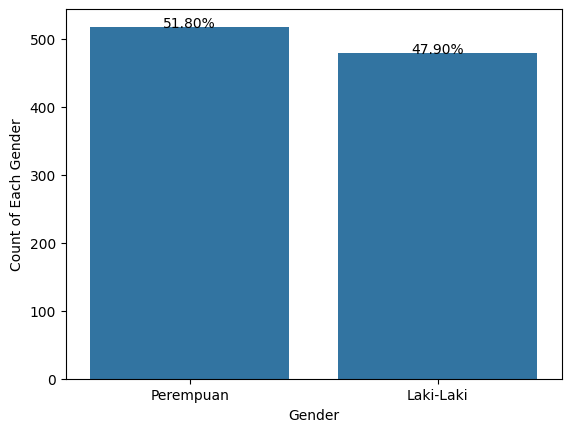

In [11]:
ax = sns.countplot(data=df, x='Gender')

# Calculate the percentage for each category
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            '{:.2f}%'.format((height / total
                              ) * 100),
            ha="center")
plt.ylabel('Count of Each Gender')
plt.show()

> Imputation method based on distribution :

- Daily Time Spent on Site and Daily Internet Usage : mean
- Area Income : median
- Gender : mode

In [12]:
# Impute missing values
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# EDA

In [13]:
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage,Duplicated Values,Unique Values,5 Unique Sample
0,Daily Time Spent on Site,float64,0,0.0,0,891,"[68.95, 80.23, 69.47, 74.15, 68.37]"
1,Age,int64,0,0.0,0,43,"[35, 31, 26, 29, 23]"
2,Area Income,float64,0,0.0,0,987,"[432837300.0, 479092950.00000006, 418501580.0, 383643260.0, 517229930.00000006]"
3,Daily Internet Usage,float64,0,0.0,0,956,"[256.09, 193.77, 236.5, 245.89, 225.58]"
4,Gender,object,0,0.0,0,2,"[Perempuan, Laki-Laki]"
5,Visit Time,datetime64[ns],0,0.0,0,997,"[2016-03-27 00:53:00, 2016-04-04 01:39:00, 2016-03-13 20:35:00, 2016-01-10 02:31:00, 2016-06-03 03:36:00]"
6,City,object,0,0.0,0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
7,Province,object,0,0.0,0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Timur, Kepulauan Riau, Sumatra Utara]"
8,Category,object,0,0.0,0,10,"[Furniture, Food, Electronic, House, Finance]"
9,Clicked on Ad,object,0,0.0,0,2,"[No, Yes]"


- Categorical columns (10 columns): 
    - `Gender` : nominal
    - `City` : nominal
    - `Province` : nominal
    - `Category` : nominal
    -  `Clicked on Ad` : nominal (Binary 0 & 1)

- Numerical/Continuous columns (18 columns) :

    - `Daily Time Spent on Site, Age, Area Income, Daily Internet Usage`

- Date column (1 column) :
    -  `Visit Time`

In [14]:
# Grouping columns based on data types
nums_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

cats_cols = ['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

date_cols = ['Visit Time']

## Statistical Summary

In [17]:
# Numerical columns
nums_summary = df[nums_cols].describe().transpose()
nums_summary['range'] = nums_summary['max'] - nums_summary['min']
nums_summary['coefficient of variation'] = nums_summary['std'] / nums_summary['mean']

nums_summary

,count,mean,std,min,25%,50%,75%,max,range,coefficient of variation
Daily Time Spent on Site,1000.0,6.492952e+01,1.574127e+01,32.60,5.154500e+01,6.778000e+01,7.835250e+01,9.143000e+01,5.883000e+01,0.242436
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01,4.200000e+01,0.243982
Area Income,1000.0,3.850493e+08,9.347971e+07,97975500.00,3.298201e+08,3.990683e+08,4.566932e+08,5.563936e+08,4.584181e+08,0.242773
Daily Internet Usage,1000.0,1.798636e+02,4.362795e+01,104.78,1.390175e+02,1.810650e+02,2.182875e+02,2.670100e+02,1.622300e+02,0.242561


In [18]:
# Categorical columns
cats_summary = df[cats_cols].describe().transpose()

cats_summary['bottom'] = [df[col].value_counts().idxmin() for col in cats_cols]
cats_summary['freq_bottom'] = [df[col].value_counts().min() for col in cats_cols]

cats_summary

,count,unique,top,freq,bottom,freq_bottom
Gender,1000,2,Perempuan,521,Laki-Laki,479
City,1000,30,Surabaya,64,Serang,11
Province,1000,16,Daerah Khusus Ibukota Jakarta,253,Kalimantan Barat,12
Category,1000,10,Otomotif,112,Bank,90
Clicked on Ad,1000,2,No,500,No,500


In [19]:
# Date columns
df[date_cols].describe().transpose()

,count,mean,min,25%,50%,75%,max
Visit Time,1000,2016-04-10 10:33:36.840000,2016-01-01 02:52:00,2016-02-18 02:55:15,2016-04-07 17:27:00,2016-05-31 03:18:00,2016-07-24 00:22:00


## Univariate Analysis

### Numerical

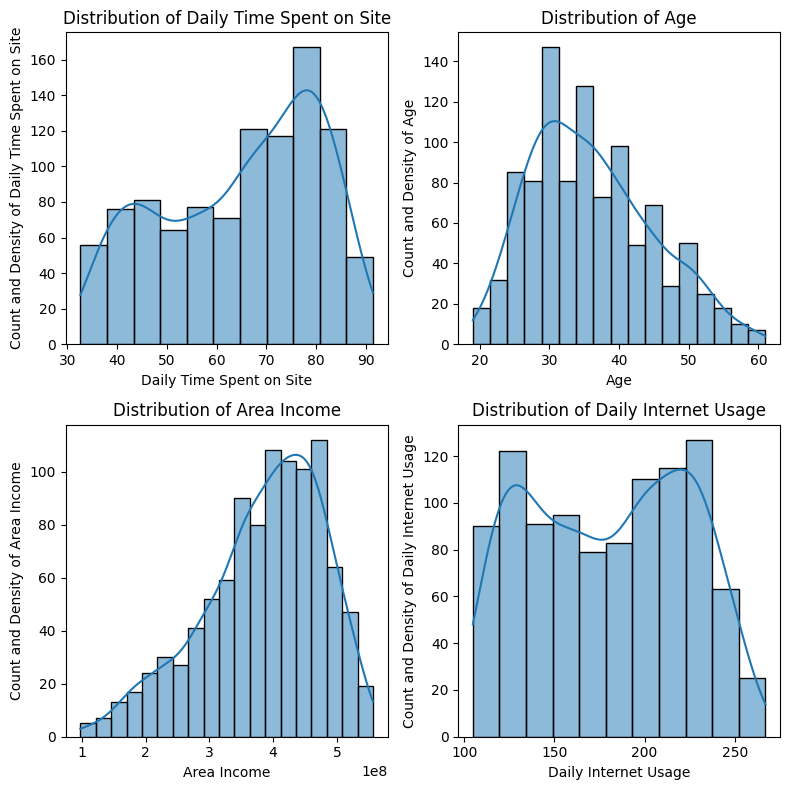

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.histplot(data=df, x=col, ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_ylabel(f'Count and Density of {col}')
    ax[i].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

In [21]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols :
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Daily Internet Usage', 'Daily Time Spent on Site']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Column Name']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

,Column Name,Skewness,Kurtosis,Type of Distribution
0,Daily Time Spent on Site,-0.372,-1.074,Uniform Distribution
1,Age,0.478,-0.405,Moderately Normal Distribution (Symmetric)
2,Area Income,-0.653,-0.079,Moderately Normal Distribution (Symmetric)
3,Daily Internet Usage,-0.032,-1.258,Uniform Distribution


Distribution types of each numerical column can be seen in above dataframe, that is almost all of them are categorized as normal distribution. 

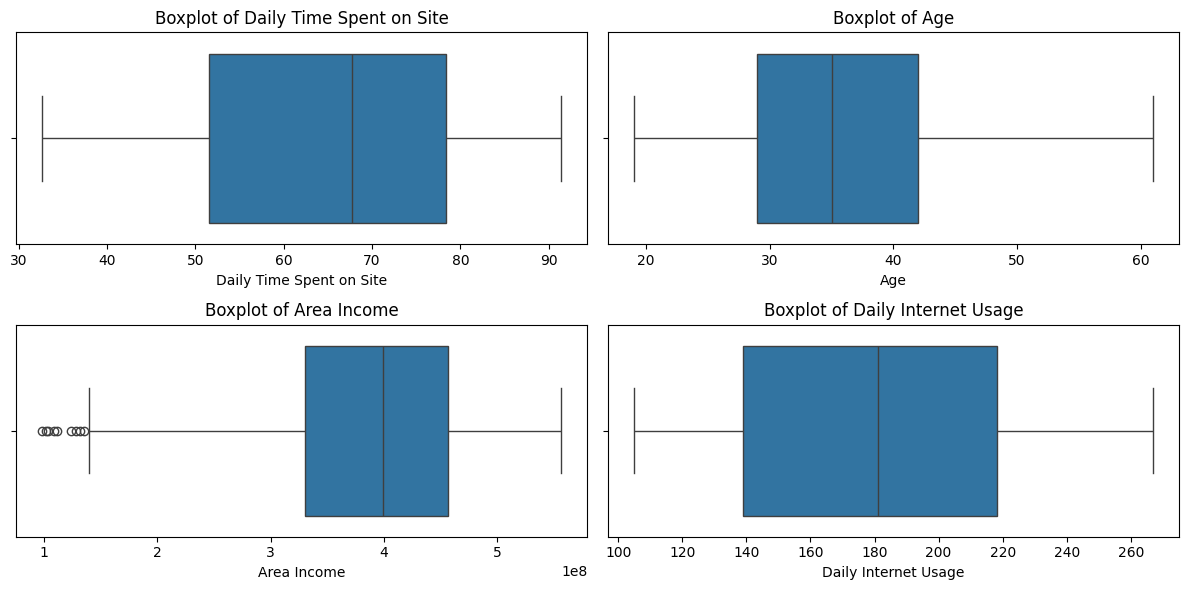

In [22]:
# Boxplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col)
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [23]:
# Outlier detection for original data

print(f'')
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

percentage_outlier = np.array(outlier) / len(df) * 100
check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data': outlier,
    'Non-Outlier Data': no_outlier,
    'Percentage of Outlier': percentage_outlier
})

check_outliers


Amount of Rows: 1000
Amount of Outlier Rows : 9
Amount of Non-Outlier Rows : 991
Percentage of Outliers : 0.9



,Column Name,Outlier Exist,Lower Limit,Upper Limit,Outlier Data,Non-Outlier Data,Percentage of Outlier
0,Daily Time Spent on Site,False,1.133375e+01,1.185637e+02,0,1000,0.0
1,Age,False,9.500000e+00,6.150000e+01,0,1000,0.0
2,Area Income,True,1.395105e+08,6.470028e+08,9,991,0.9
3,Daily Internet Usage,False,2.011250e+01,3.371925e+02,0,1000,0.0


### Categorical

In [24]:
cats_cols

['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

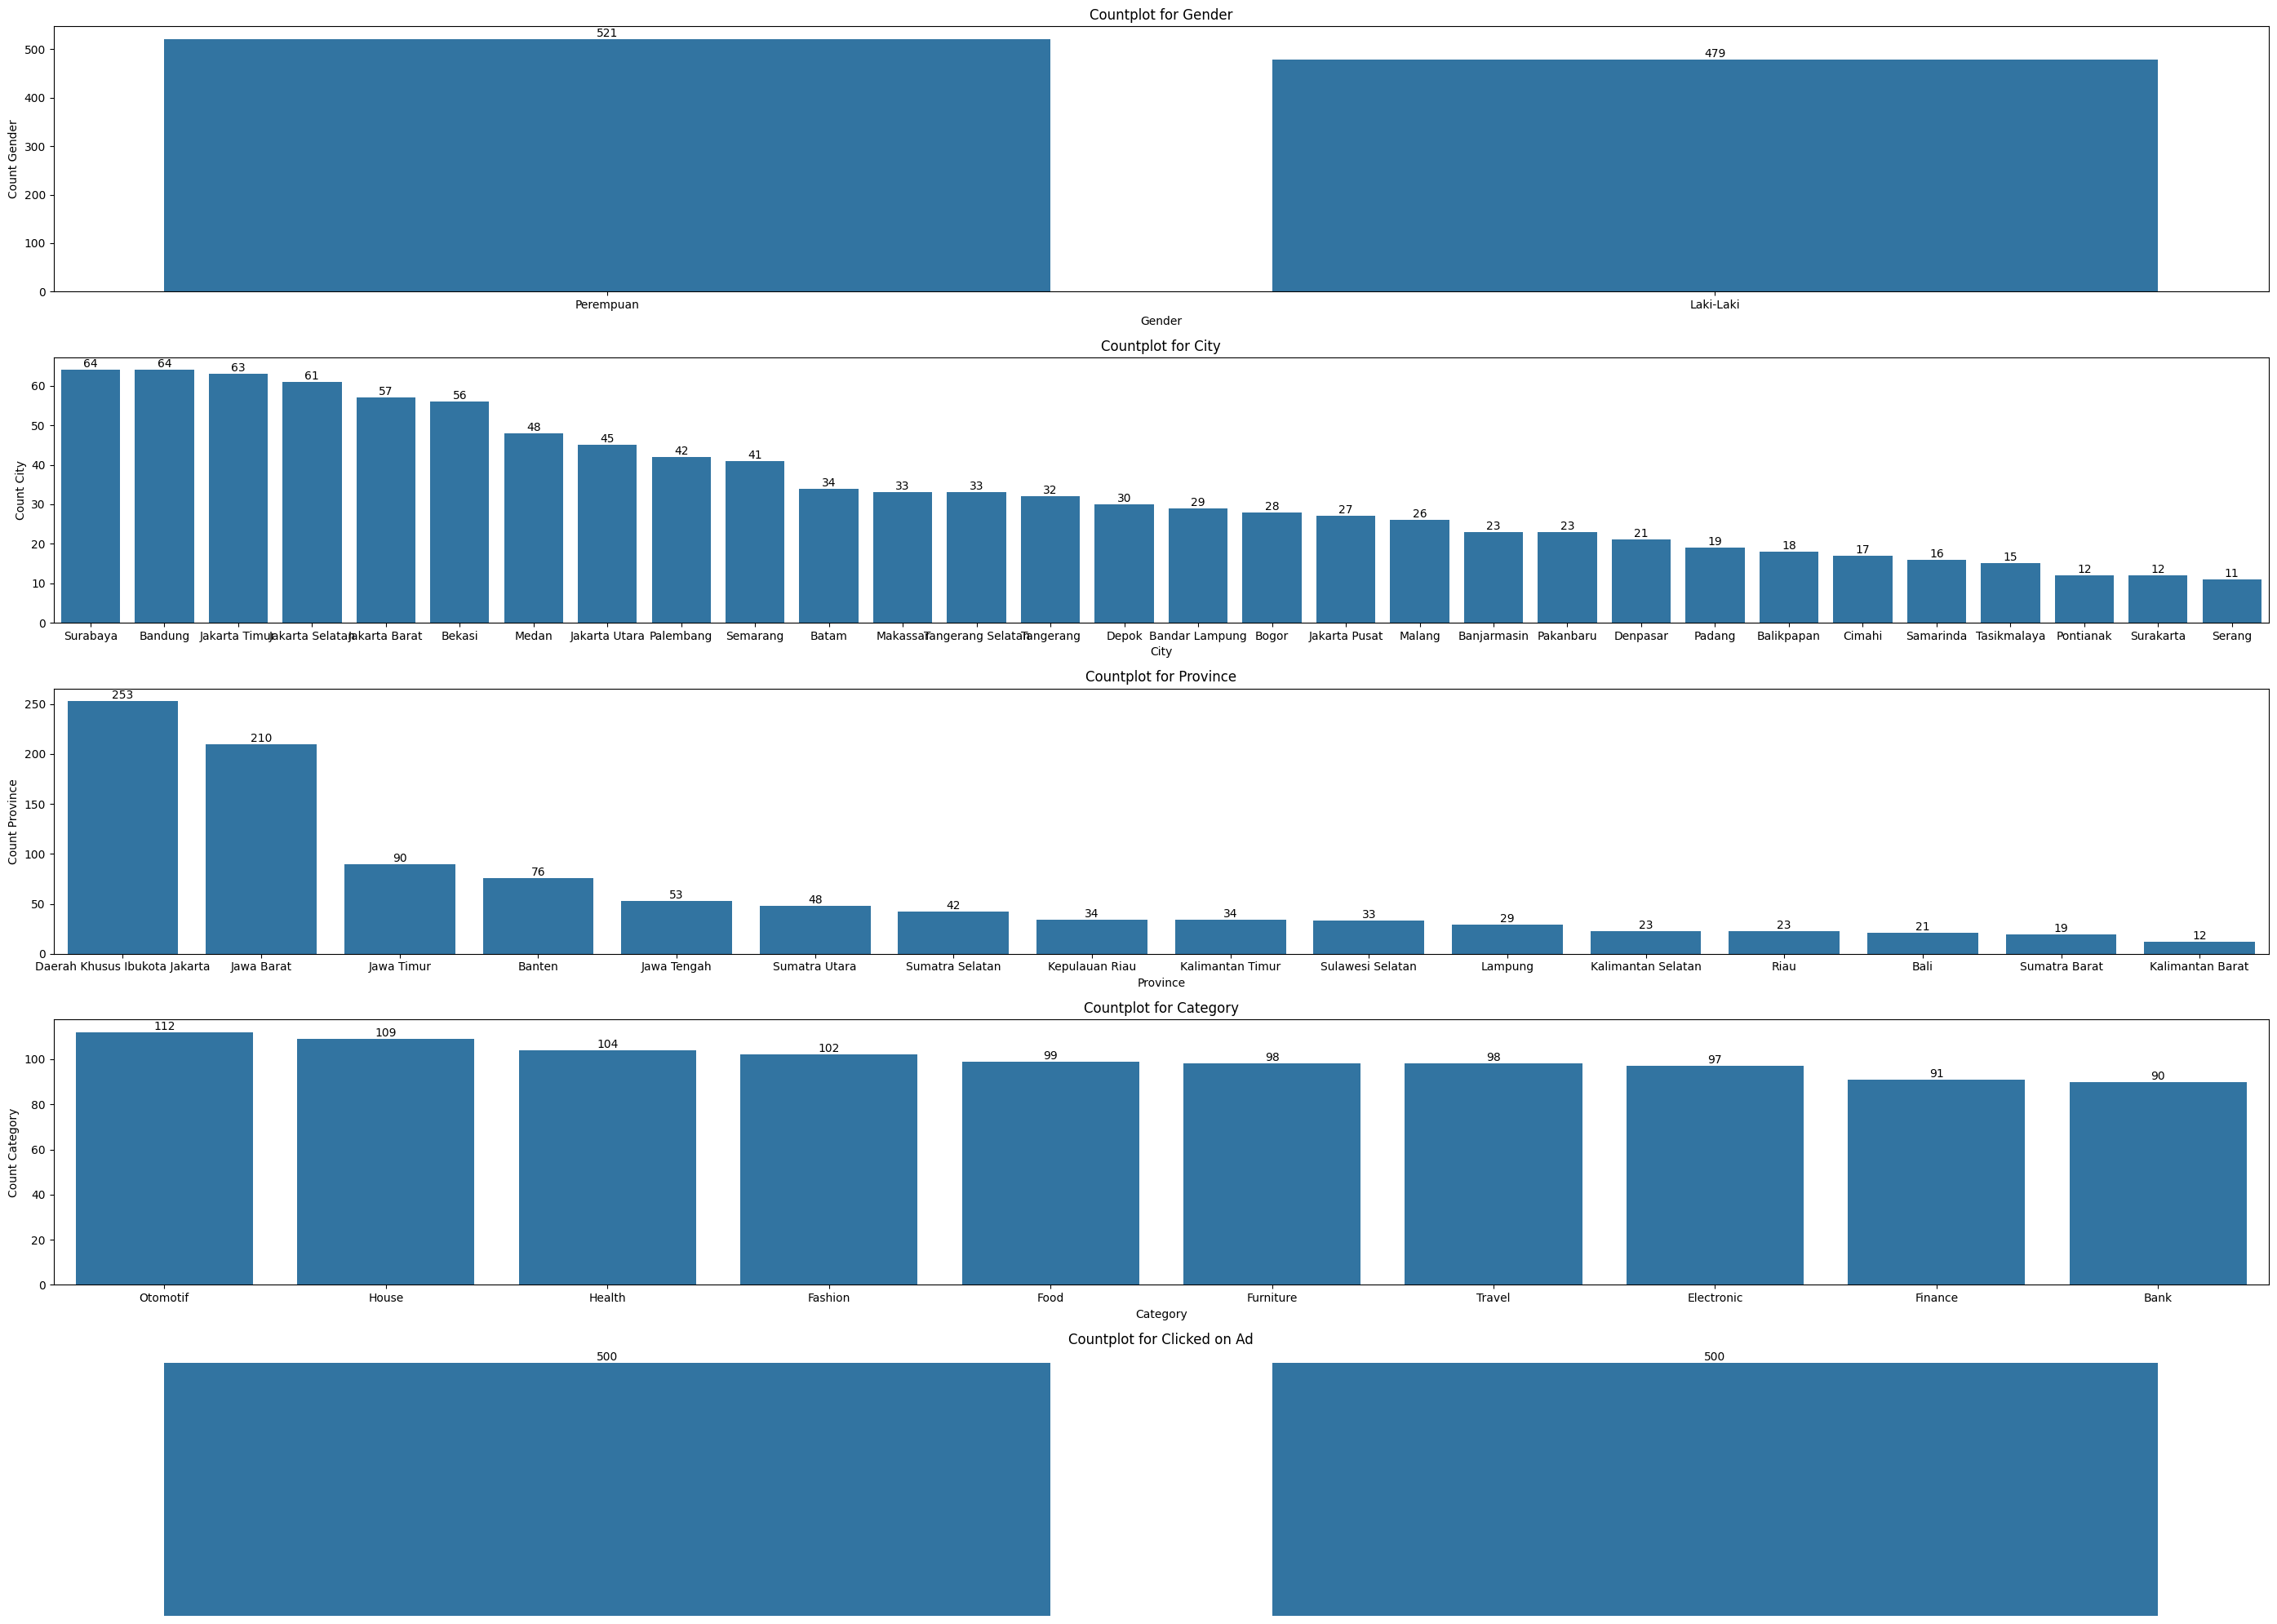

In [25]:
# Categorical Countplot
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(28, 20))
ax = ax.flatten()

for i, col in enumerate(cats_cols):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    ax[i].bar_label(ax[i].containers[0])

ax[-1].axis('off')
plt.tight_layout()
plt.show()

## Bivariate/Multivariate Analysis

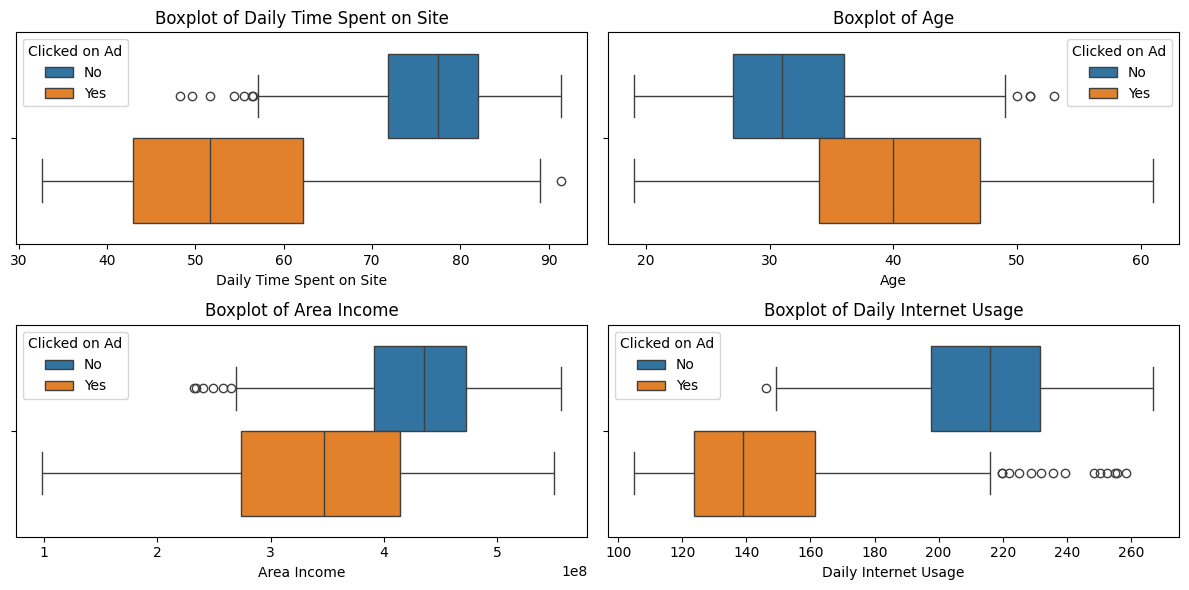

In [26]:
# Boxplot with hue target
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col, hue='Clicked on Ad')
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

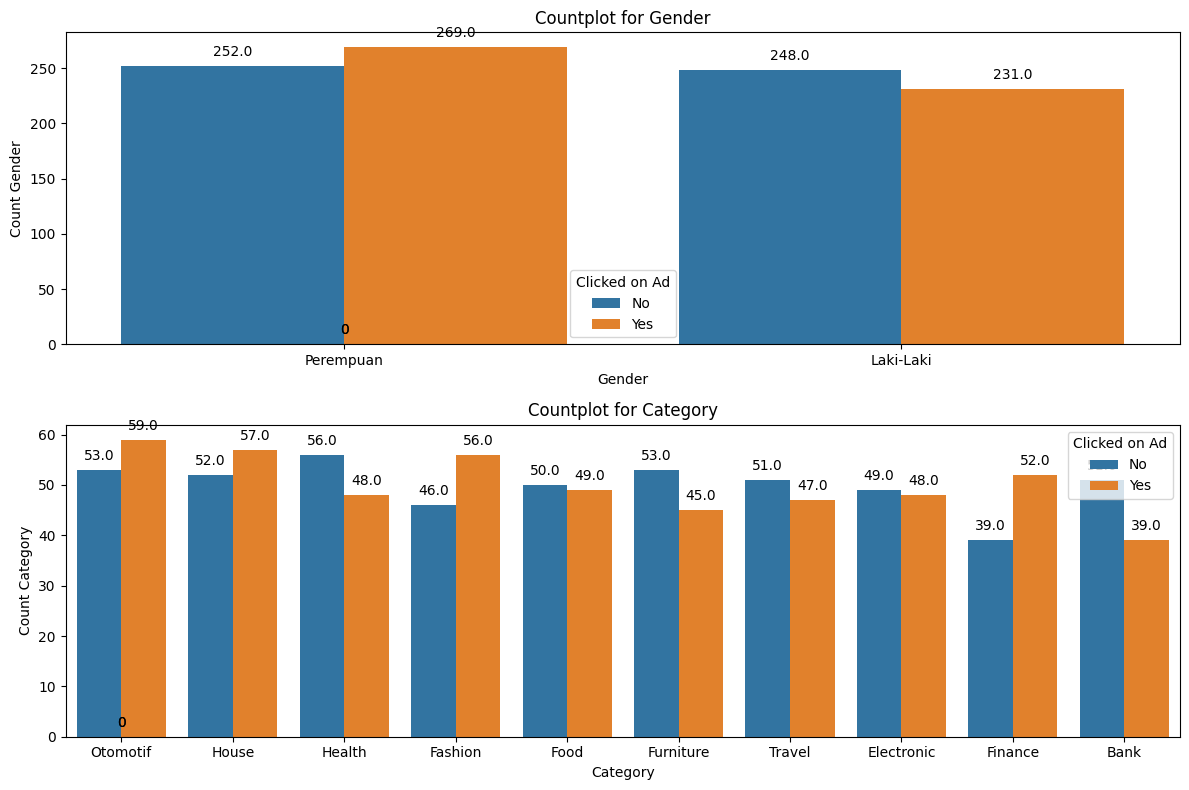

In [31]:
# Categorical Countplot with hue target (only for gender and category)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
ax = ax.flatten()

cats_cols_few = ['Gender', 'Category']

for i, col in enumerate(cats_cols_few):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index, hue='Clicked on Ad')
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    
    # Adding annotations on top of each bar
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

There is not much difference between clicked and not cliked on the advertisement.

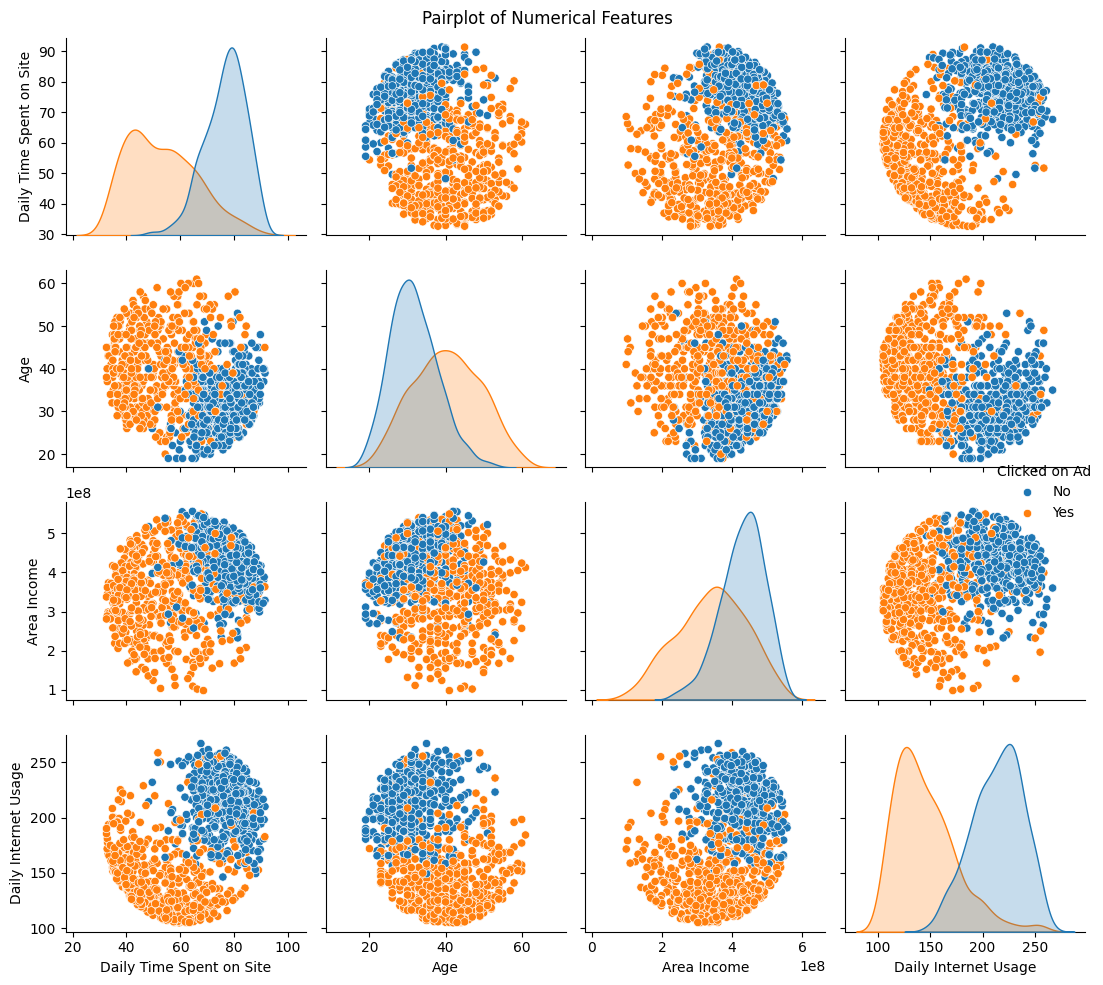

In [126]:
# Pairplot of numerical features
sns.pairplot(data=df, diag_kind='kde', hue='Clicked on Ad')
plt.suptitle('Pairplot of Numerical Features')
plt.tight_layout()
plt.show()

This is quite an interesting segmentation of target variable. One of them that the values distribution is not linear.

Text(0.5, 1.0, 'Spearman Correlation')

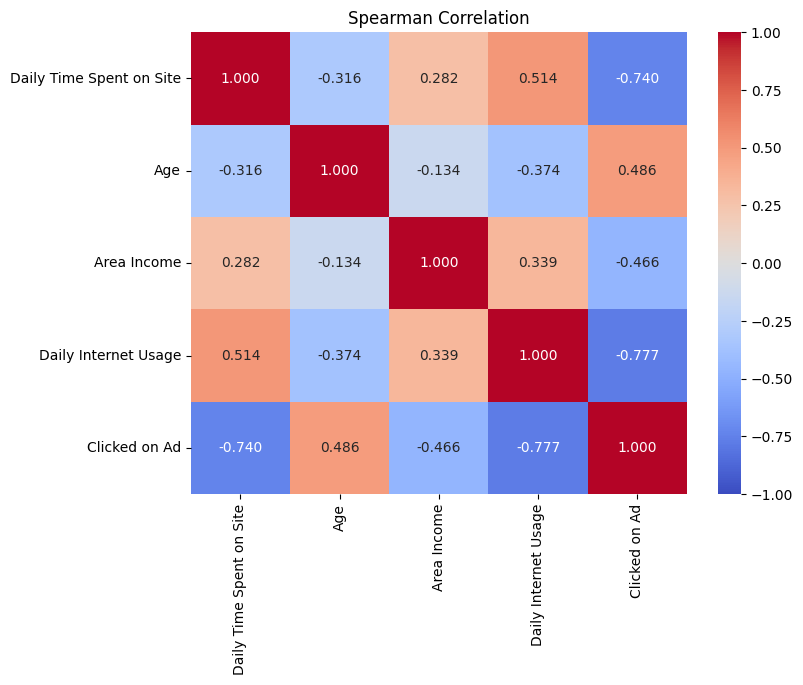

In [159]:
# Heatmap of numerical values
df['Clicked on Ad'] = df['Clicked on Ad'].replace({'No' : 0, # Quick label encoding for target
                                                   'Yes' : 1})

fig, ax = plt.subplots()
sns.heatmap(data=df.corr(method='spearman', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Spearman Correlation')

Text(0.5, 1.0, 'Kendall Correlation')

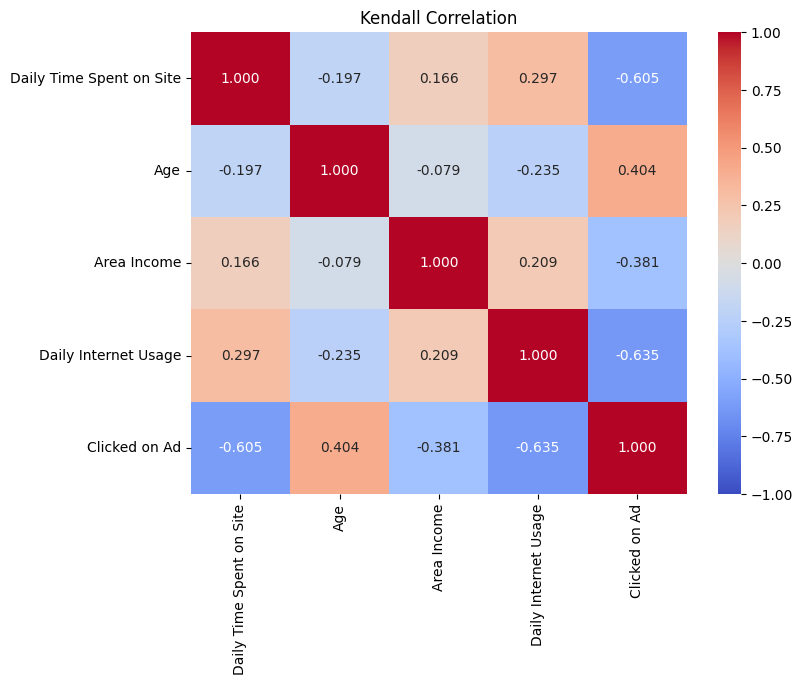

In [136]:
# Heatmap of numerical values
df['Clicked on Ad'] = df['Clicked on Ad'].replace({'No' : 0, # Quick label encoding for target
                                                   'Yes' : 1})

plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(method='kendall', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Kendall Correlation')

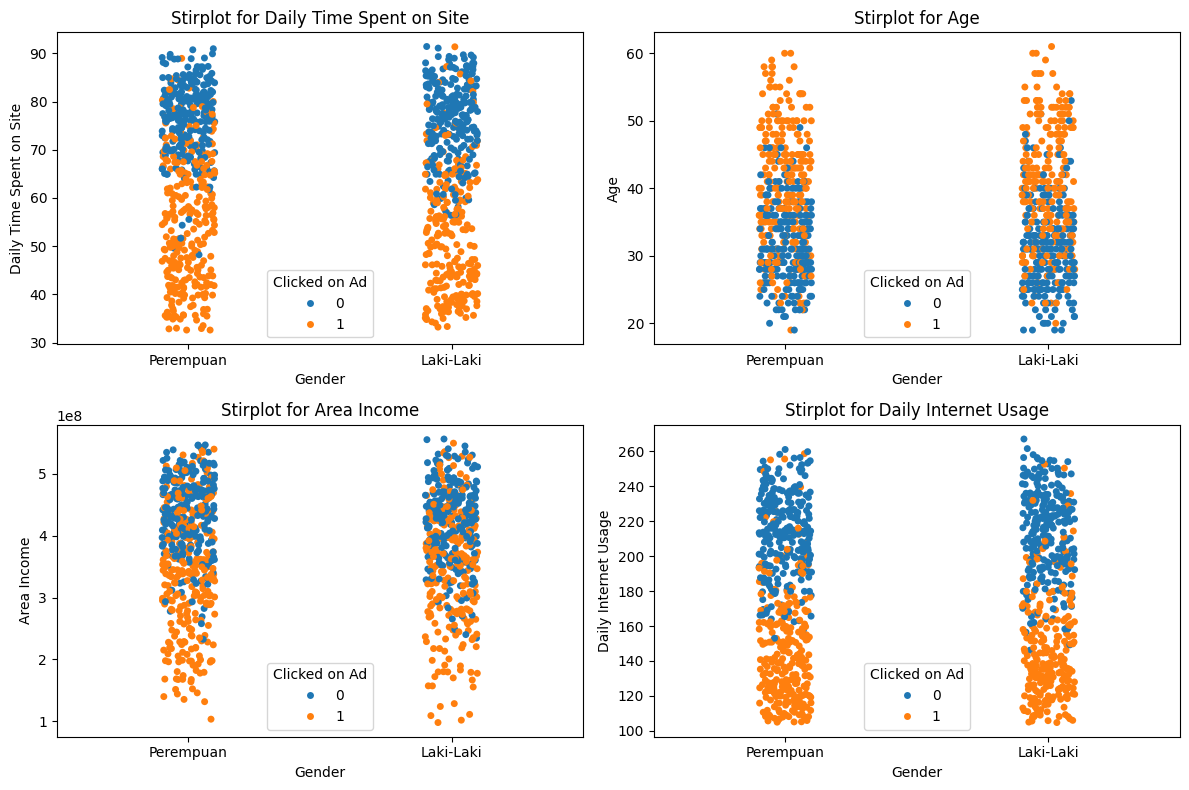

In [144]:
# Stripplot for Gender
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Gender', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Gender Stirplot for {col}')

plt.tight_layout()
plt.show()

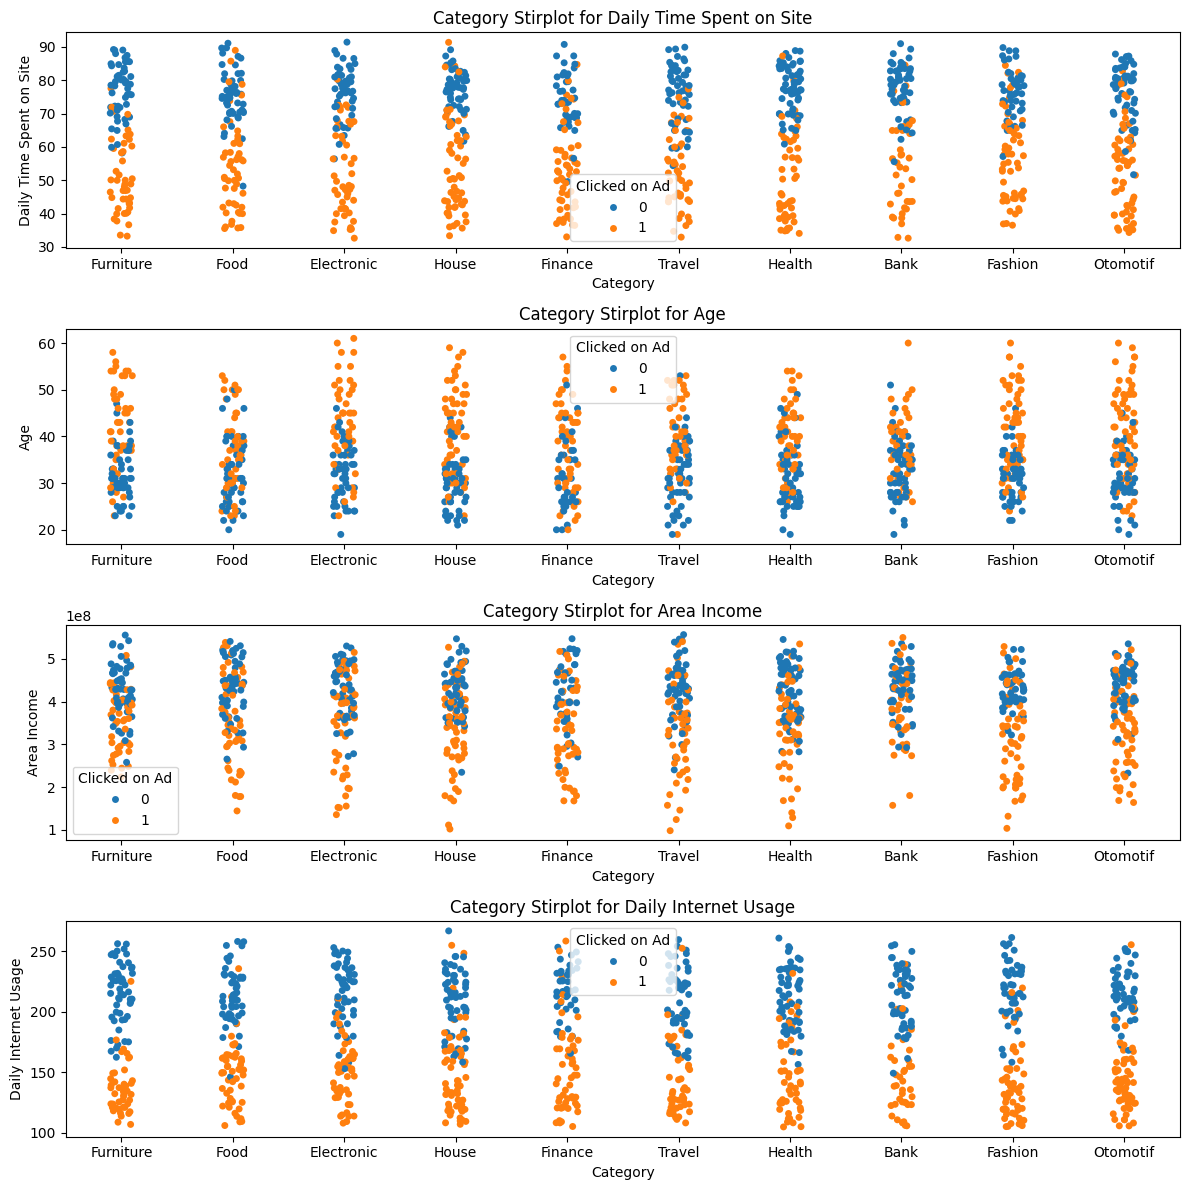

In [158]:
# Stripplot for Category
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Category', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Category Stirplot for {col}')
    # ax[i].legend().remove()

plt.tight_layout()
plt.show()

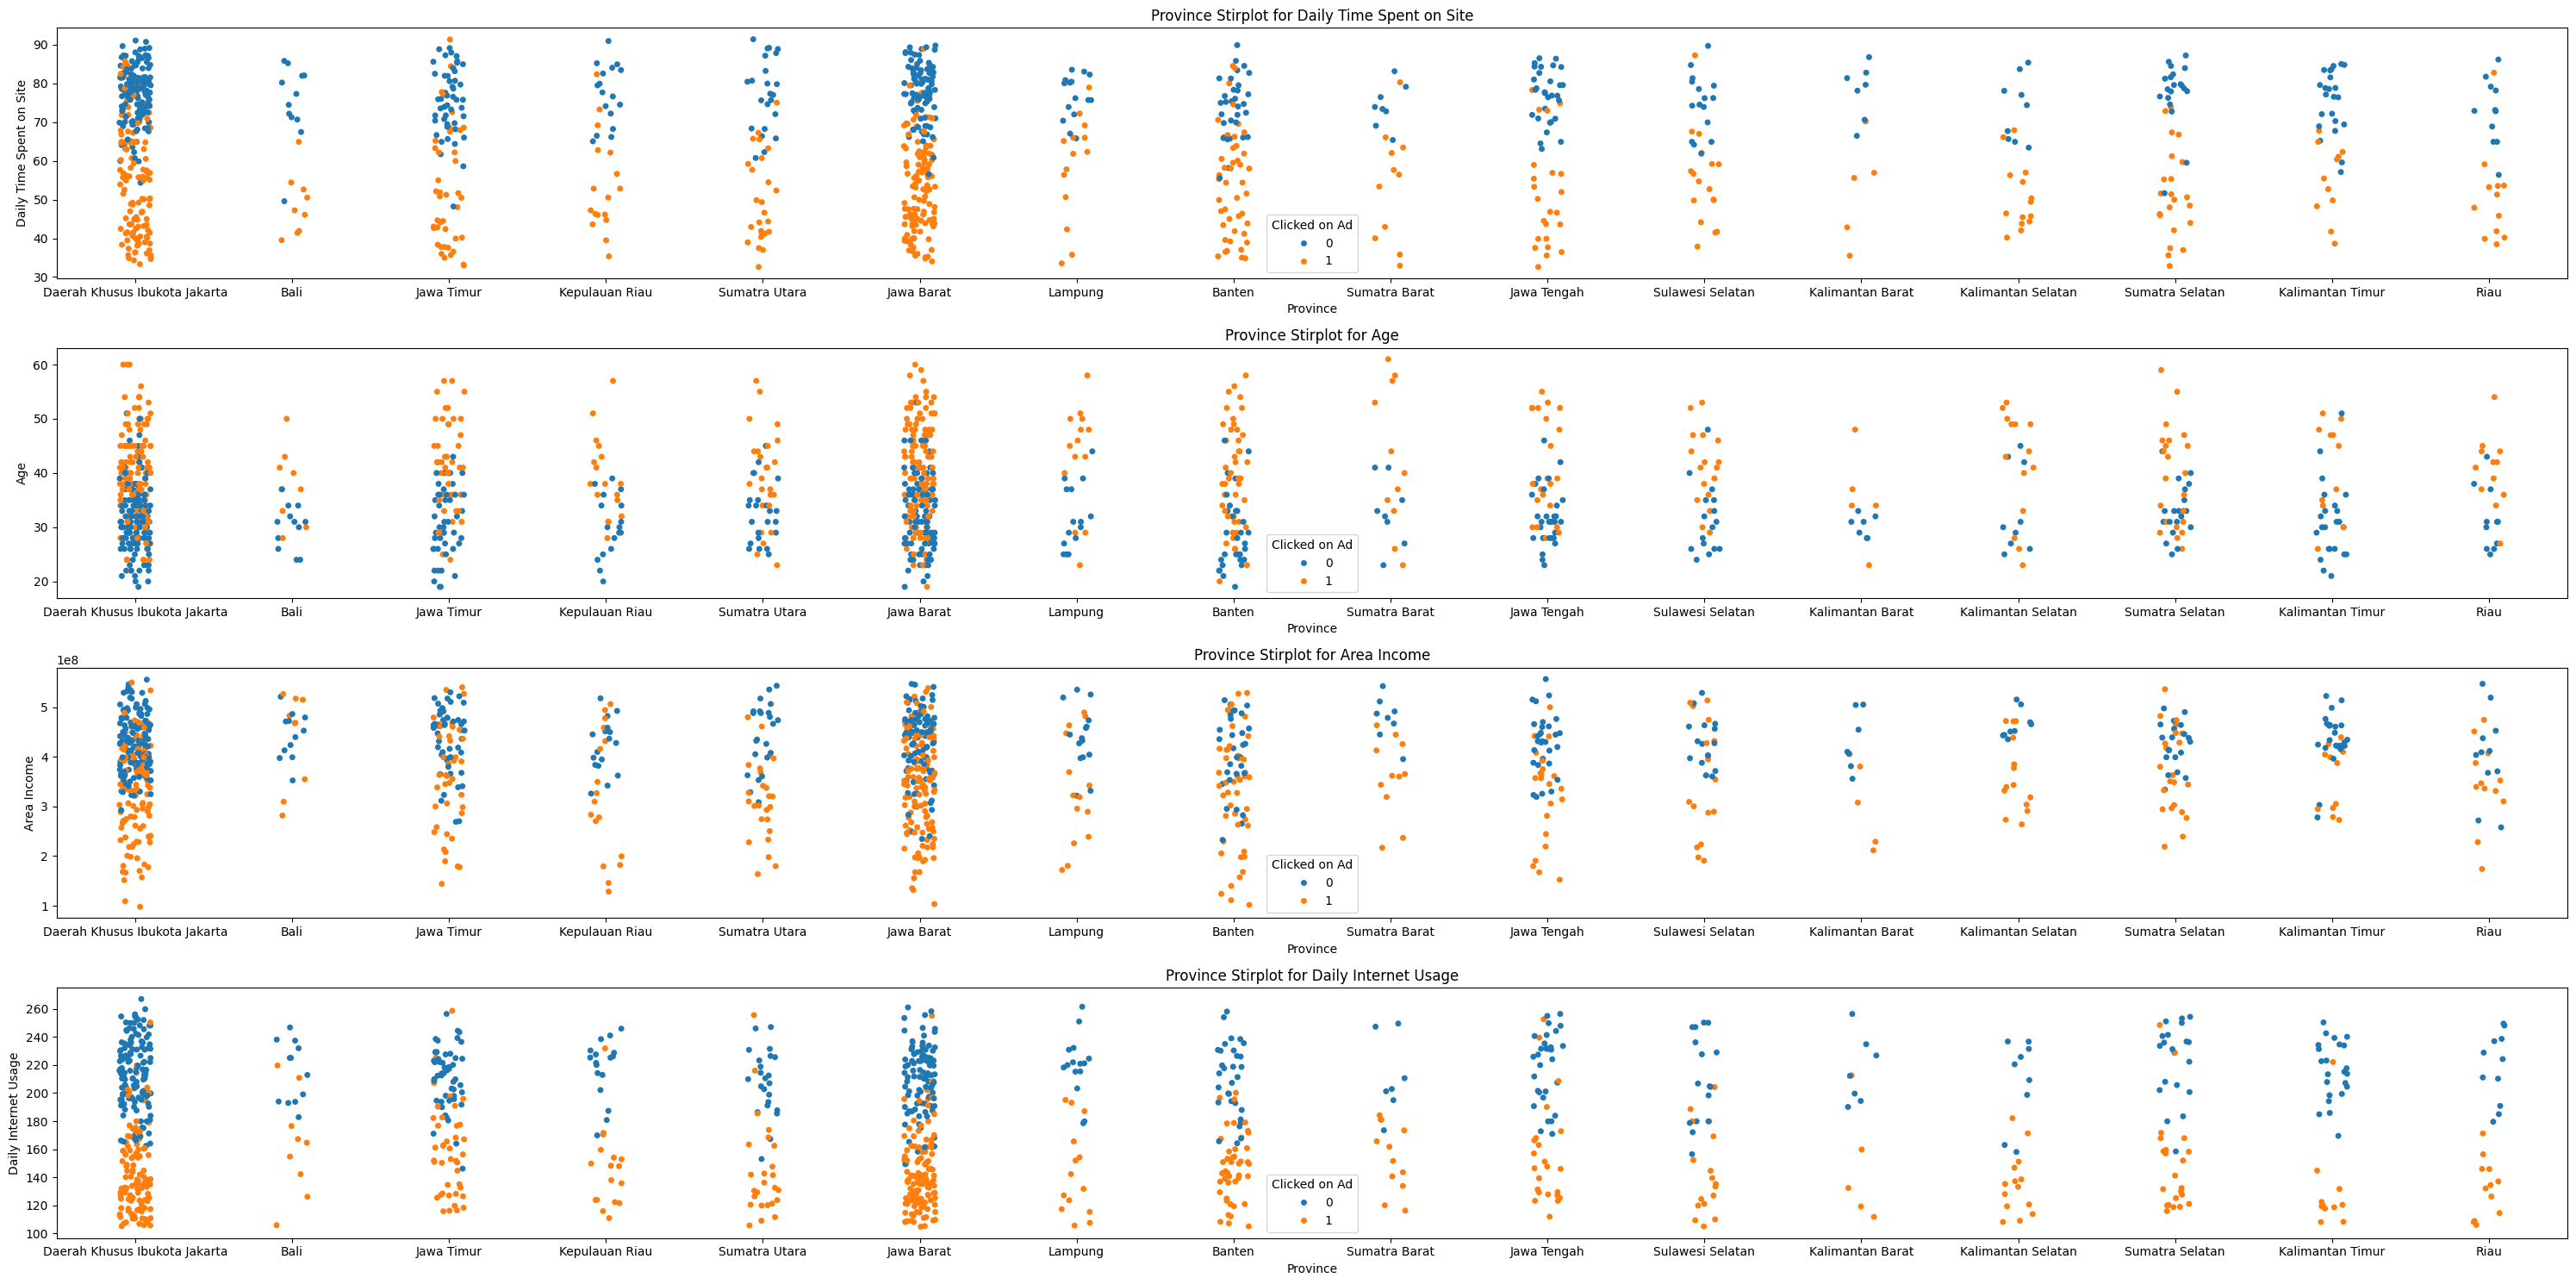

In [155]:
# Stripplot for Province
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(30, 15))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Province', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Province Stirplot for {col}')
    # ax[i].legend().remove()

plt.tight_layout()
plt.show()